# Import Libraries

In [1]:
# Load libraries
import numpy as np
from matplotlib import pyplot
from pandas import read_csv 
from pandas import set_option
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pyodbc
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Connect to SQL Server

In [2]:
pyodbc.drivers()

['SQL Server', 'ODBC Driver 17 for SQL Server']

In [3]:
connection = pyodbc.connect(
"Driver={ODBC Driver 17 for SQL Server};"
"Server=DESKTOP-ROTIMI\SQLEXPRESS;"
"Database=LMS;"
"Trusted_Connection=yes;")

# load dataset

#### Extracting data from SQL Server

In [4]:
# View data from SQL Server
Book_Details = pd.read_sql("Select * from [dbo].[LMS_BOOK_DETAILS]",connection)

# Book_Details Table

#### View Data

In [5]:
# head
Book_Details.head()

,BOOK_CODE,BOOK_TITLE,CATEGORY,AUTHOR,PUBLICATION,PUBLISH_DATE,BOOK_EDITION,PRICE,RACK_NUM,DATE_ARRIVAL,SUPPLIER_ID
0,BL000001,Programming in ANSI C,C PROGRAMMING,E. Balagurusamy,Tata McGraw-Hill,2013-07-01,6,400.0,A1,2015-01-02,S01
1,BL000002,Let Us C,C PROGRAMMING,Yashavant Kanetkar,BPB Publications,2016-08-01,13,375.0,A1,2017-03-15,S01
2,BL000003,The C Programming Language,C PROGRAMMING,"Brian W. Kernighan, Dennis M. Ritchie",Prentice Hall,1988-03-22,2,500.0,A1,2000-05-10,S02
3,BL000004,Object-Oriented Programming with C++,C++ PROGRAMMING,E. Balagurusamy,Tata McGraw-Hill,2008-10-01,4,575.0,A2,2009-12-12,S01
4,BL000005,Effective Modern C++,C++ PROGRAMMING,Scott Meyers,O'Reilly Media,2014-11-01,1,700.0,A2,2016-06-15,S03


#### shape of the data

In [6]:
# shape
print(Book_Details.shape)


(34, 11)


In [7]:
#Basic info
print(Book_Details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BOOK_CODE     34 non-null     object 
 1   BOOK_TITLE    34 non-null     object 
 2   CATEGORY      34 non-null     object 
 3   AUTHOR        34 non-null     object 
 4   PUBLICATION   34 non-null     object 
 5   PUBLISH_DATE  34 non-null     object 
 6   BOOK_EDITION  34 non-null     int64  
 7   PRICE         34 non-null     float64
 8   RACK_NUM      34 non-null     object 
 9   DATE_ARRIVAL  34 non-null     object 
 10  SUPPLIER_ID   34 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.1+ KB
None


#### types of the data column

In [8]:
# types
print(Book_Details.dtypes)


BOOK_CODE        object
BOOK_TITLE       object
CATEGORY         object
AUTHOR           object
PUBLICATION      object
PUBLISH_DATE     object
BOOK_EDITION      int64
PRICE           float64
RACK_NUM         object
DATE_ARRIVAL     object
SUPPLIER_ID      object
dtype: object


#### data descriptions

In [9]:
# Summary statistics (numerical columns)
Book_Details.describe()


,BOOK_EDITION,PRICE
count,34.000000,34.000000
mean,2.852941,869.117647
std,2.797535,324.682760
min,1.000000,375.000000
25%,1.000000,650.000000
50%,2.000000,850.000000
75%,3.750000,1025.000000
max,13.000000,1800.000000


#### data descriptions

In [10]:
# descriptions
Book_Details.describe(include = 'object')


,BOOK_CODE,BOOK_TITLE,CATEGORY,AUTHOR,PUBLICATION,PUBLISH_DATE,RACK_NUM,DATE_ARRIVAL,SUPPLIER_ID
count,34,34,34,34,34,34,34,34,34
unique,34,34,11,33,14,33,11,34,5
top,BL000001,Programming in ANSI C,JAVASCRIPT,E. Balagurusamy,O'Reilly Media,2015-04-14,A2,2015-01-02,S01
freq,1,1,5,2,12,2,5,1,8


#### Check for missing entries

In [11]:
# Check for missing entries
total = Book_Details.isnull().sum().sort_values(ascending=False)
percent=(Book_Details.isnull().sum()*100/len(Book_Details)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
BOOK_CODE,0,0.0
BOOK_TITLE,0,0.0
CATEGORY,0,0.0
AUTHOR,0,0.0
PUBLICATION,0,0.0
PUBLISH_DATE,0,0.0
BOOK_EDITION,0,0.0
PRICE,0,0.0
RACK_NUM,0,0.0
DATE_ARRIVAL,0,0.0


#### Check for duplicate data

In [12]:
# locate rows of duplicate data

# calculate duplicates
dups = Book_Details.duplicated()
# report if there are any duplicates
print(dups.any())


False


In [13]:
# Convert to datetime
Book_Details['PUBLISH_DATE'] = pd.to_datetime(Book_Details['PUBLISH_DATE'])
Book_Details['DATE_ARRIVAL'] = pd.to_datetime(Book_Details['DATE_ARRIVAL'])

In [14]:
# First 5 Records
Book_Details.head()

,BOOK_CODE,BOOK_TITLE,CATEGORY,AUTHOR,PUBLICATION,PUBLISH_DATE,BOOK_EDITION,PRICE,RACK_NUM,DATE_ARRIVAL,SUPPLIER_ID
0,BL000001,Programming in ANSI C,C PROGRAMMING,E. Balagurusamy,Tata McGraw-Hill,2013-07-01,6,400.0,A1,2015-01-02,S01
1,BL000002,Let Us C,C PROGRAMMING,Yashavant Kanetkar,BPB Publications,2016-08-01,13,375.0,A1,2017-03-15,S01
2,BL000003,The C Programming Language,C PROGRAMMING,"Brian W. Kernighan, Dennis M. Ritchie",Prentice Hall,1988-03-22,2,500.0,A1,2000-05-10,S02
3,BL000004,Object-Oriented Programming with C++,C++ PROGRAMMING,E. Balagurusamy,Tata McGraw-Hill,2008-10-01,4,575.0,A2,2009-12-12,S01
4,BL000005,Effective Modern C++,C++ PROGRAMMING,Scott Meyers,O'Reilly Media,2014-11-01,1,700.0,A2,2016-06-15,S03


# Analysis

In [15]:
# Top Book Categories by Count
Book_Details['CATEGORY'].value_counts()

CATEGORY
JAVASCRIPT                      5
DATA SCIENCE                    5
WEB DEVELOPMENT                 4
C PROGRAMMING                   3
PYTHON PROGRAMMING              3
JAVA                            3
FUNDAMENTALS                    3
AI                              3
C++ PROGRAMMING                 2
THEORETICAL COMPUTER SCIENCE    2
PROGRAMMING                     1
Name: count, dtype: int64

In [16]:
# Top Authors by Number of Books
Book_Details['AUTHOR'].value_counts()

AUTHOR
E. Balagurusamy                                   2
Alex Banks, Eve Porcello                          1
Richard S. Sutton, Andrew G. Barto                1
Stuart Russell, Peter Norvig                      1
Robert Sedgewick, Kevin Wayne                     1
Michael Sipser                                    1
Peter Bruce, Andrew Bruce                         1
Ian Goodfellow, Yoshua Bengio, Aaron Courville    1
Aurélien Géron                                    1
Wes McKinney                                      1
Joel Grus                                         1
Jacob Lett                                        1
Steve Krug                                        1
Jon Duckett                                       1
Adam Freeman                                      1
Stoyan Stefanov                                   1
Douglas Crockford                                 1
Yashavant Kanetkar                                1
Marijn Haverbeke                                  1
Kyle 

In [17]:
# Number of Books Published by Each Publisher
Book_Details['PUBLICATION'].value_counts()

PUBLICATION
O'Reilly Media      12
Addison-Wesley       4
Tata McGraw-Hill     3
No Starch Press      3
Prentice Hall        2
MIT Press            2
BPB Publications     1
CareerCup            1
Apress               1
Wiley                1
New Riders           1
Leanpub              1
Cengage Learning     1
Pearson              1
Name: count, dtype: int64

In [18]:
# Book Count by Rack Number
Book_Details['RACK_NUM'].value_counts()


RACK_NUM
A2     5
A8     5
A10    5
A9     4
A1     3
A3     3
A12    3
A6     2
A11    2
A5     1
A7     1
Name: count, dtype: int64

In [19]:
# Number of Books Supplied by Each Supplier
Book_Details['SUPPLIER_ID'].value_counts()


SUPPLIER_ID
S01    8
S04    8
S03    7
S05    6
S02    5
Name: count, dtype: int64

In [20]:
# Oldest book published
("Oldest book published:", Book_Details['PUBLISH_DATE'].min())


('Oldest book published:', Timestamp('1988-03-22 00:00:00'))

In [21]:
# Most recent book published
print("Most recent book published:", Book_Details['PUBLISH_DATE'].max())


Most recent book published: 2020-04-06 00:00:00


In [22]:
print("The Most expensive book:")
print(Book_Details.loc[Book_Details['PRICE'].idxmax()])


The Most expensive book:
BOOK_CODE                                         BL000032
BOOK_TITLE      Artificial Intelligence: A Modern Approach
CATEGORY                                                AI
AUTHOR                        Stuart Russell, Peter Norvig
PUBLICATION                                        Pearson
PUBLISH_DATE                           2020-04-06 00:00:00
BOOK_EDITION                                             4
PRICE                                               1800.0
RACK_NUM                                               A12
DATE_ARRIVAL                           2021-03-25 00:00:00
SUPPLIER_ID                                            S04
Name: 31, dtype: object


In [23]:
print("The Least expensive book:")
print(Book_Details.loc[Book_Details['PRICE'].idxmin()])


The Least expensive book:
BOOK_CODE                  BL000002
BOOK_TITLE                 Let Us C
CATEGORY              C PROGRAMMING
AUTHOR           Yashavant Kanetkar
PUBLICATION        BPB Publications
PUBLISH_DATE    2016-08-01 00:00:00
BOOK_EDITION                     13
PRICE                         375.0
RACK_NUM                         A1
DATE_ARRIVAL    2017-03-15 00:00:00
SUPPLIER_ID                     S01
Name: 1, dtype: object


# Data Visualization

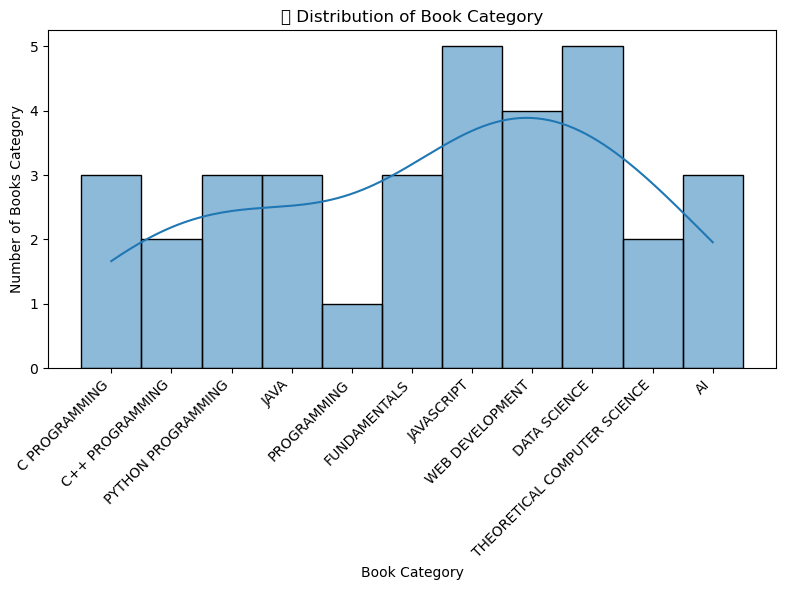

In [24]:
# Book Category Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(Book_Details['CATEGORY'], kde=True)
plt.title('📅 Distribution of Book Categories')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Book Category')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.show()


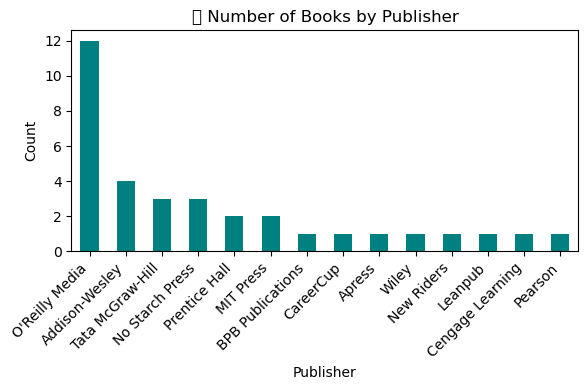

In [25]:
# Nos Of Books by Publisher (Bar Plot)
plt.figure(figsize=(6, 4))
Book_Details['PUBLICATION'].value_counts().plot(kind='bar', color='teal')
plt.title('🏢 Number of Books by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


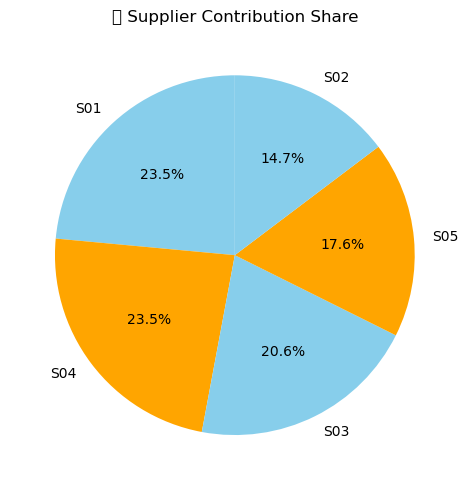

In [26]:
# Books Supplied by Each Supplier (Pie Chart)
plt.figure(figsize=(5, 5))
Book_Details['SUPPLIER_ID'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('🚚 Supplier Contribution Share')
plt.ylabel('')
plt.tight_layout()
plt.show()


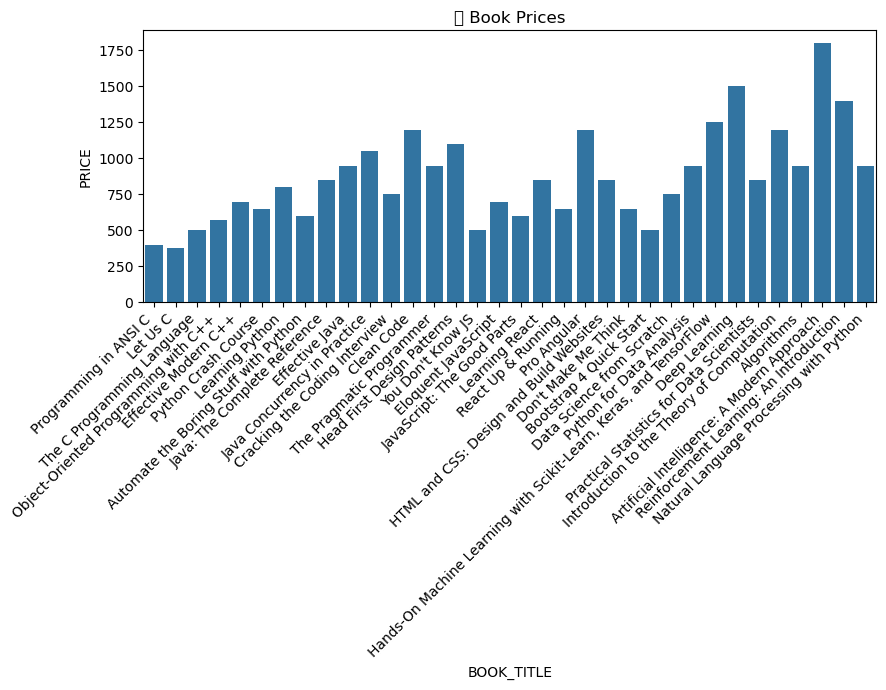

In [27]:
# Bar chart of prices
plt.figure(figsize=(9, 7))
sns.barplot(x='BOOK_TITLE', y='PRICE', data=Book_Details)
plt.xticks(rotation=45, ha='right')
plt.title('📊 Book Prices')
plt.tight_layout()
plt.show()

## 🔍 Key Insights

The most popular book categories based on the number of books available are:

- **JavaScript** – 5 books  
- **Data Science** – 5 books  
- **Web Development** – 4 books  

This indicates a strong demand or focus on programming and data-related 
- Supplier **S01** and **S04** contributed more books .
- Some books have been in the library for **more than 30 years** without updates.
- **O'Reilly Media**, **Addison-Wesley**, **Tata McGraw-Hill** and **No Starch Press** are the most frequent publishers in this dataset.
- Book prices range from **₦375 to ₦1800**, with moderate pricing across the collection.
- **E. Balagurusamy** appears **twice** in the author list, making him the most recurring author in the current collection.

## ✅ **Recommendations**

- **Expand Programming & Data Categories**: Given the high number of books in JavaScript, Data Science, and Web Development, consider acquiring updated and advanced titles in these areas to meet ongoing demand.

- **Engage Top Suppliers**: Since suppliers **S01** and **S04** contributed the most books, strengthen partnerships with them and explore opportunities for regular contributions or updated materials.

- **Update Outdated Books**: Books older than 30 years may contain obsolete content. Prioritize reviewing and replacing them with newer editions or more current titles, especially in fast-evolving tech fields.

- **Leverage Popular Publishers**: Publishers like **O'Reilly Media**, **Addison-Wesley**, **Tata McGraw-Hill**, and **No Starch Press** consistently appear. Continue sourcing from these trusted publishers for quality content.

- **Maintain Affordable Pricing**: With book prices ranging from ₦375 to ₦1800, maintain this affordable pricing strategy to support accessibility while monitoring for inflation or cost-effective alternatives.

- **Highlight Popular Authors**: Authors like **E. Balagurusamy** appear multiple times, indicating popularity or value. Consider showcasing such authors in featured sections or acquiring other works by them.


## 🧾 Conclusion

This project analyzed a sample dataset of books from a library system, focusing on key areas such as book categories, publication dates, suppliers, and pricing. 

The findings revealed an outdated collection heavily focused on a single category (C Programming), a reliance on one main supplier, and minimal rack organization. 

Visualizations and descriptive analytics were used to uncover hidden trends and guide practical recommendations for improvement.

Despite the dataset being small and manually sourced, this project demonstrates the ability to perform end-to-end data analysis, generate insights, and translate those insights into actionable decisions.


In [30]:
# Export Book_Details data to CSV without index
Book_Details.to_csv("Book_Details.csv",index =False)

## 💬 Contact

Feel free to connect with me on:
- GitHub: [https://github.com/rotimi2020]
- LinkedIn: [https://www.linkedin.com/in/rotimi-sheriff-omosewo-939a806b/]
- Email: [omoseworotimi@gmail.com]




*This is part of a full LMS portfolio project.  
See the complete analysis and contact info in the final notebook [Library_Management_System_Final_Analysis.ipynb].*
